In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/sales_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

sns.set_theme(style="whitegrid", palette="Set2")


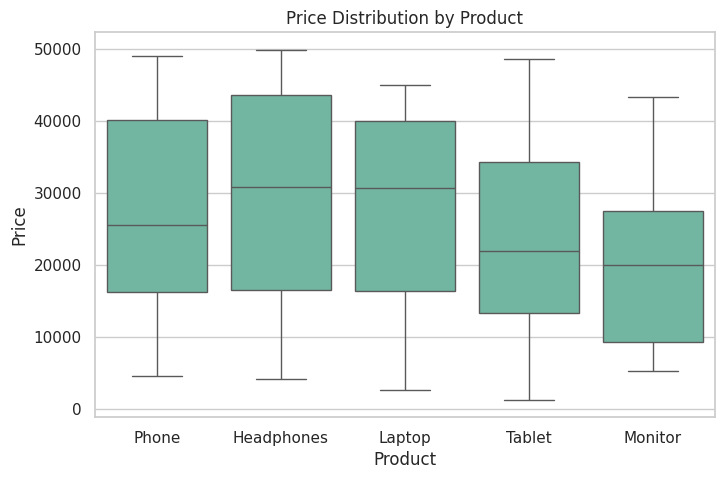

In [2]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Product', y='Price', data=df)
plt.title('Price Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Price')
plt.show()


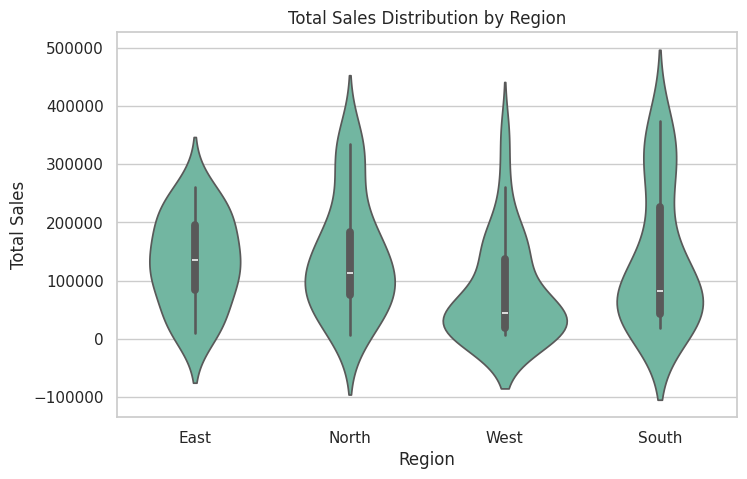

In [3]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Region', y='Total_Sales', data=df)
plt.title('Total Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()


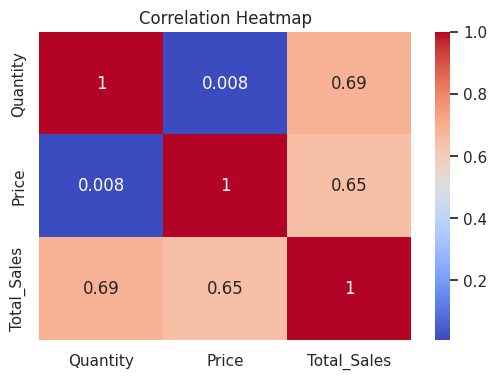

In [4]:
plt.figure(figsize=(6,4))
corr = df[['Quantity', 'Price', 'Total_Sales']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


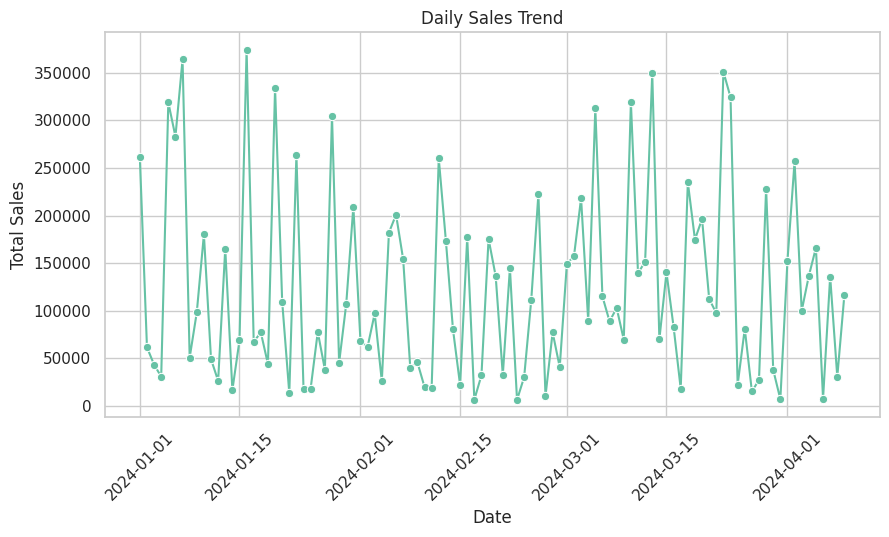

In [5]:
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Total_Sales', data=daily_sales, marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


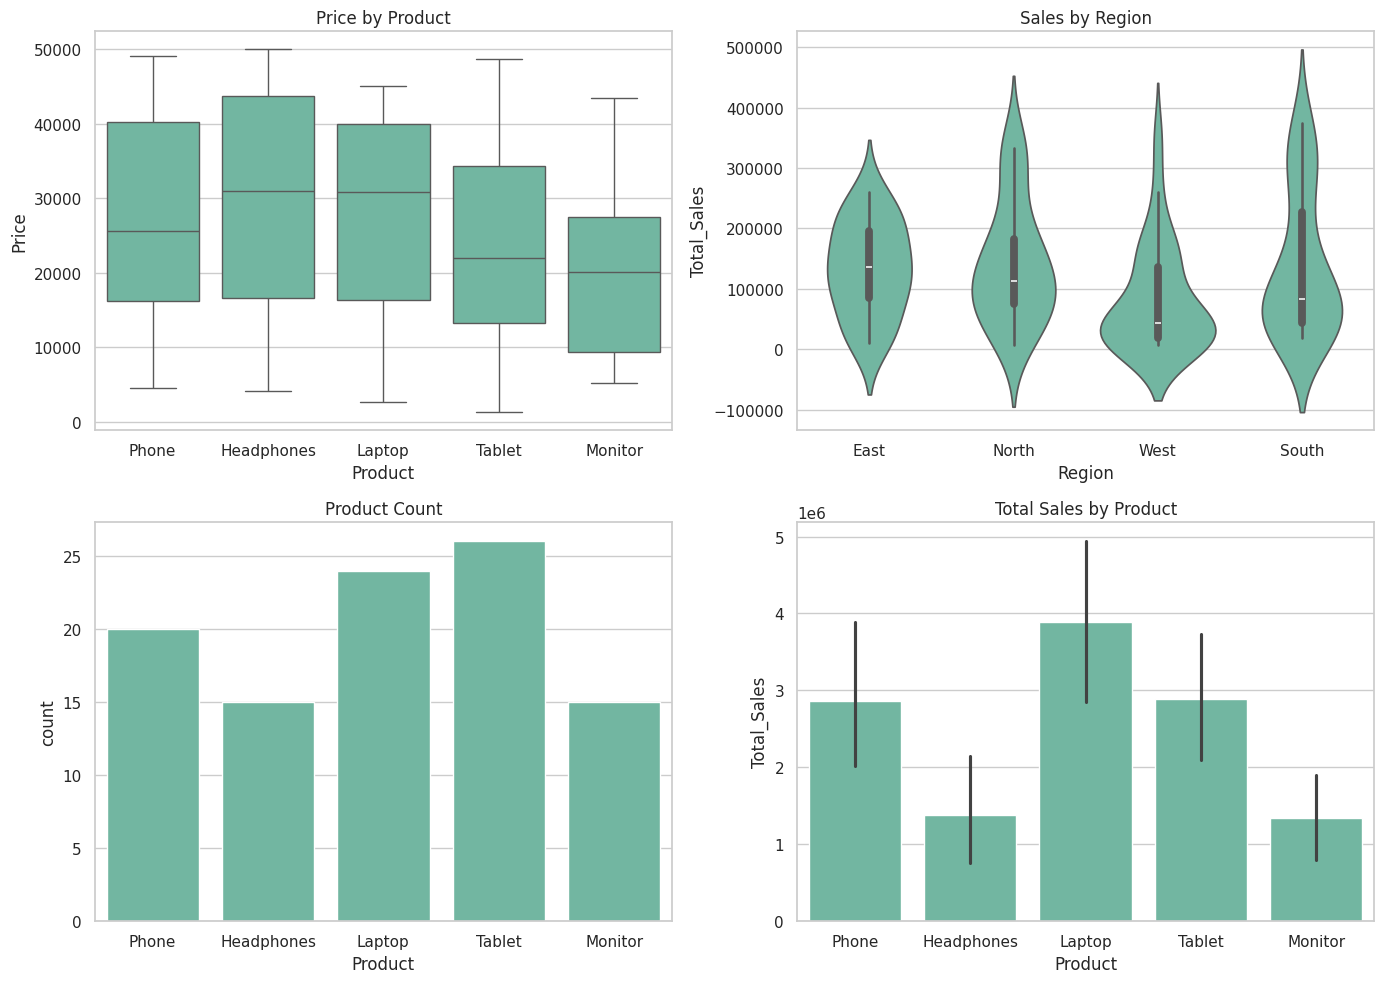

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.boxplot(ax=axes[0,0], x='Product', y='Price', data=df)
axes[0,0].set_title('Price by Product')

sns.violinplot(ax=axes[0,1], x='Region', y='Total_Sales', data=df)
axes[0,1].set_title('Sales by Region')

sns.countplot(ax=axes[1,0], x='Product', data=df)
axes[1,0].set_title('Product Count')

sns.barplot(ax=axes[1,1], x='Product', y='Total_Sales', data=df, estimator=sum)
axes[1,1].set_title('Total Sales by Product')

plt.tight_layout()
plt.show()


In [7]:
import plotly.express as px

fig = px.line(
    daily_sales,
    x='Date',
    y='Total_Sales',
    title='Interactive Sales Trend',
    markers=True
)
fig.show()
